**Mohamed Rafiq M**

Task 2 - Prediction using Unsupervised Learning

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import  datasets
%matplotlib inline

Reading the dataset

In [2]:
iris_data = datasets.load_iris()
data_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data_df.shape

(150, 4)

In [4]:
data_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [5]:
data_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Finding optimum number of clusters

In [6]:
x = data_df.iloc[:, [0, 1, 2, 3]].values

In [7]:
from sklearn.cluster import KMeans
cluster_sum = []

for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    k_means.fit(x)
    cluster_sum.append(k_means.inertia_)

Plotting the results

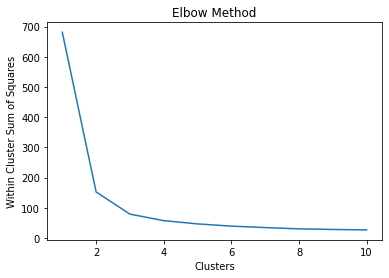

In [8]:
plt.plot(range(1, 11), cluster_sum)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

Creating the Classifier

In [9]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = k_means.fit_predict(x)

Visualizing the Cluster and Plotting the centroids

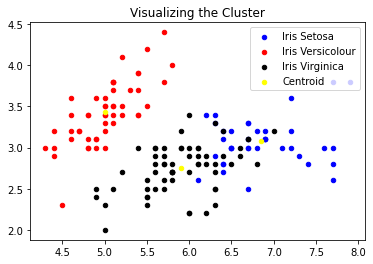

In [10]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 20, c = 'blue', label = 'Iris Setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 20, c = 'red', label = 'Iris Versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 20, c = 'black', label = 'Iris Virginica')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 20, c = 'yellow', label = 'Centroid')
plt.legend(scatterpoints = 1, frameon = True, loc = 'upper right')
plt.title('Visualizing the Cluster')
plt.show()